# Predicting survivors on Titanic using tree-based method

## Part 1: Importing library

In [89]:
import sys 
import pandas as pd
import matplotlib 
import numpy as np
import scipy as sp 
import IPython
from IPython import display 
import sklearn 
import random
import time



In [90]:
#import model and visulizaing tools
from sklearn import tree, linear_model, ensemble

from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#configurate matplotlib
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Part 2 : Import data


In [91]:
#preprocessing has been done in seperate notebook
data1 = pd.read_csv("data1.csv")

In [92]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)



## Step 3: Model Data

In [93]:
#Machine Learning Algorithm (MLA) 
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

 
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
  
    #Trees    
    tree.DecisionTreeClassifier()
]


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 99 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   
    
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.872097,0.822388,0.033657,0.086664
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.899813,0.815672,0.041944,0.169349
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.895318,0.812687,0.032366,0.029752
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.899813,0.809701,0.044495,0.148318
7,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.899813,0.807836,0.043426,0.005286
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.829588,0.807836,0.051844,0.083988
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.803371,0.781716,0.051844,0.008079
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.80206,0.778731,0.052277,0.297162


Text(0, 0.5, 'Algorithm')

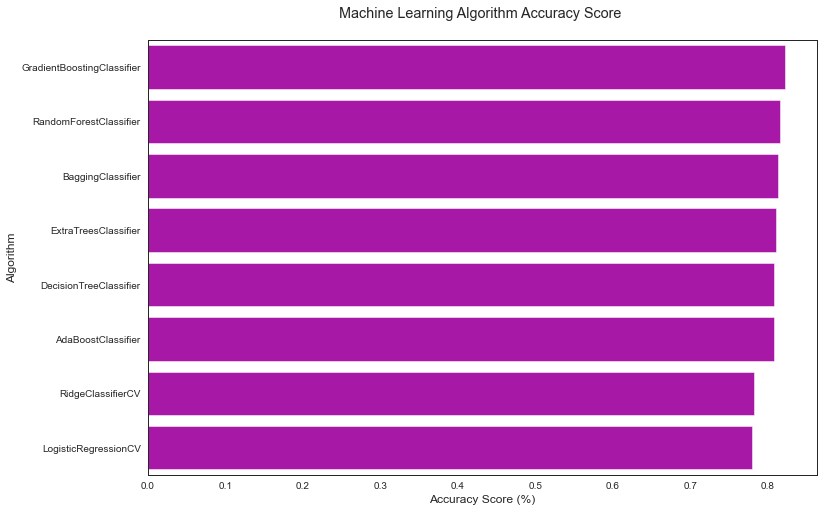

In [94]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [95]:
for tree in MLA:
    

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, train1_x_bin.values,  train1_y_bin.values,test1_x_bin.values, test1_y_bin.values, 
        loss='0-1_loss',
        random_seed=99)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    



Average expected loss: 0.474
Average bias: 105.951
Average variance: 0.039
Average expected loss: 0.463
Average bias: 102.744
Average variance: 0.087
Average expected loss: 0.464
Average bias: 102.004
Average variance: 0.080
Average expected loss: 0.460
Average bias: 101.018
Average variance: 0.065
Average expected loss: 0.466
Average bias: 102.744
Average variance: 0.081
Average expected loss: 0.469
Average bias: 104.717
Average variance: 0.033
Average expected loss: 0.468
Average bias: 103.484
Average variance: 0.029
Average expected loss: 0.461
Average bias: 101.265
Average variance: 0.086


## Step 4: Visualizing decision boundary 

In [96]:
from sklearn.datasets import make_classification
X_ex, y_ex = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

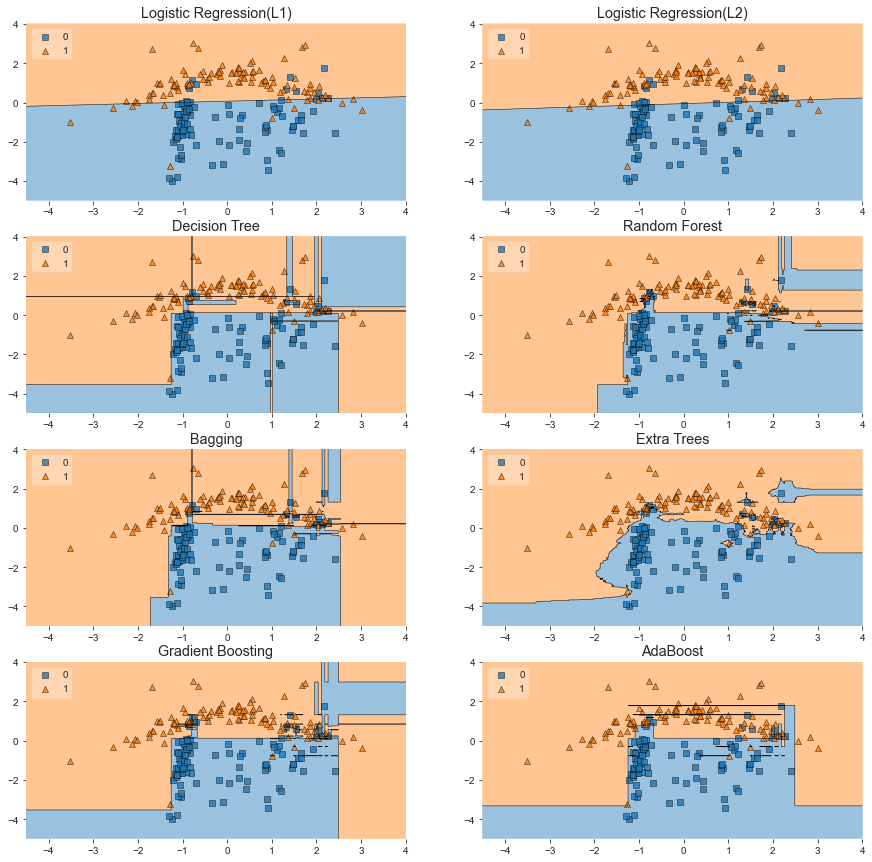

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
 
 
 
# Initializing Classifiers
clf1 = LogisticRegression()
clf2 = linear_model.RidgeClassifierCV()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()
clf5 = ensemble.BaggingClassifier()
clf6 = ensemble.ExtraTreesClassifier()
clf7 = ensemble.GradientBoostingClassifier()
clf8 = ensemble.AdaBoostClassifier()
 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
 
gs = gridspec.GridSpec(4, 2)
 
fig = plt.figure(figsize=(15,15))
 
labels = ['Logistic Regression(L1)', 'Logistic Regression(L2)', 'Decision Tree', 'Random Forest', 'Bagging', 'Extra Trees', 'Gradient Boosting','AdaBoost']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6,clf7,clf8],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1),(3,0),(3,1)]):
 
    clf.fit(X_ex, y_ex)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_ex, y=y_ex, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()